<a href="https://colab.research.google.com/github/Sauravnegi007/data-science/blob/main/Copy_of_Boston_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib  import  pyplot as plt

In [ ]:
df=pd.read_csv('HousingData.csv')

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df=df.rename(columns={'MEDV':'Price'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#Summarizing the stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [ ]:
df['CRIM'].fillna(df['CRIM'].mode()[0],inplace=True)
df['ZN'].fillna(df['ZN'].mode()[0],inplace=True)
df['INDUS'].fillna(df['INDUS'].mode()[0],inplace=True)
df['CHAS'].fillna(df['CHAS'].mode()[0],inplace=True)
df['AGE'].fillna(df['AGE'].mode()[0],inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mode()[0],inplace=True)



In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [ ]:
#EDA
#Correlation
correlation_matrix=df.corr()
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.185547,0.379754,-0.055705,0.410921,-0.220323,0.329308,-0.365909,0.600548,0.559916,0.278227,-0.364913,0.430490,-0.384108
ZN,-0.185547,1.000000,-0.497913,-0.032992,-0.498619,0.312295,-0.527256,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.385937,0.362292
INDUS,0.379754,-0.497913,1.000000,0.050288,0.735691,-0.389362,0.610734,-0.687672,0.580946,0.697661,0.372694,-0.344783,0.566693,-0.478199
CHAS,-0.055705,-0.032992,0.050288,1.000000,0.070867,0.106797,0.077579,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.044653,0.183844
NOX,0.410921,-0.498619,0.735691,0.070867,1.000000,-0.302188,0.700357,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.568643,-0.427321
RM,-0.220323,0.312295,-0.389362,0.106797,-0.302188,1.000000,-0.230265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602263,0.695360
AGE,0.329308,-0.527256,0.610734,0.077579,0.700357,-0.230265,1.000000,-0.711525,0.431239,0.483619,0.254734,-0.270793,0.561439,-0.363636
DIS,-0.365909,0.632428,-0.687672,-0.092318,-0.769230,0.205246,-0.711525,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.476652,0.249929
RAD,0.600548,-0.300061,0.580946,-0.003339,0.611441,-0.209847,0.431239,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.459460,-0.381626
TAX,0.559916,-0.304385,0.697661,-0.035822,0.668023,-0.292048,0.483619,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.516273,-0.468536


<Axes: >

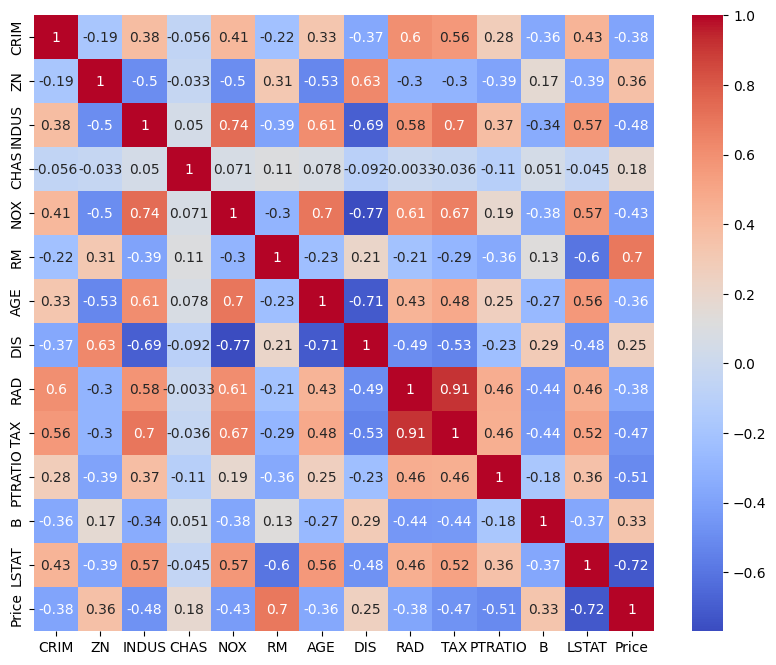

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

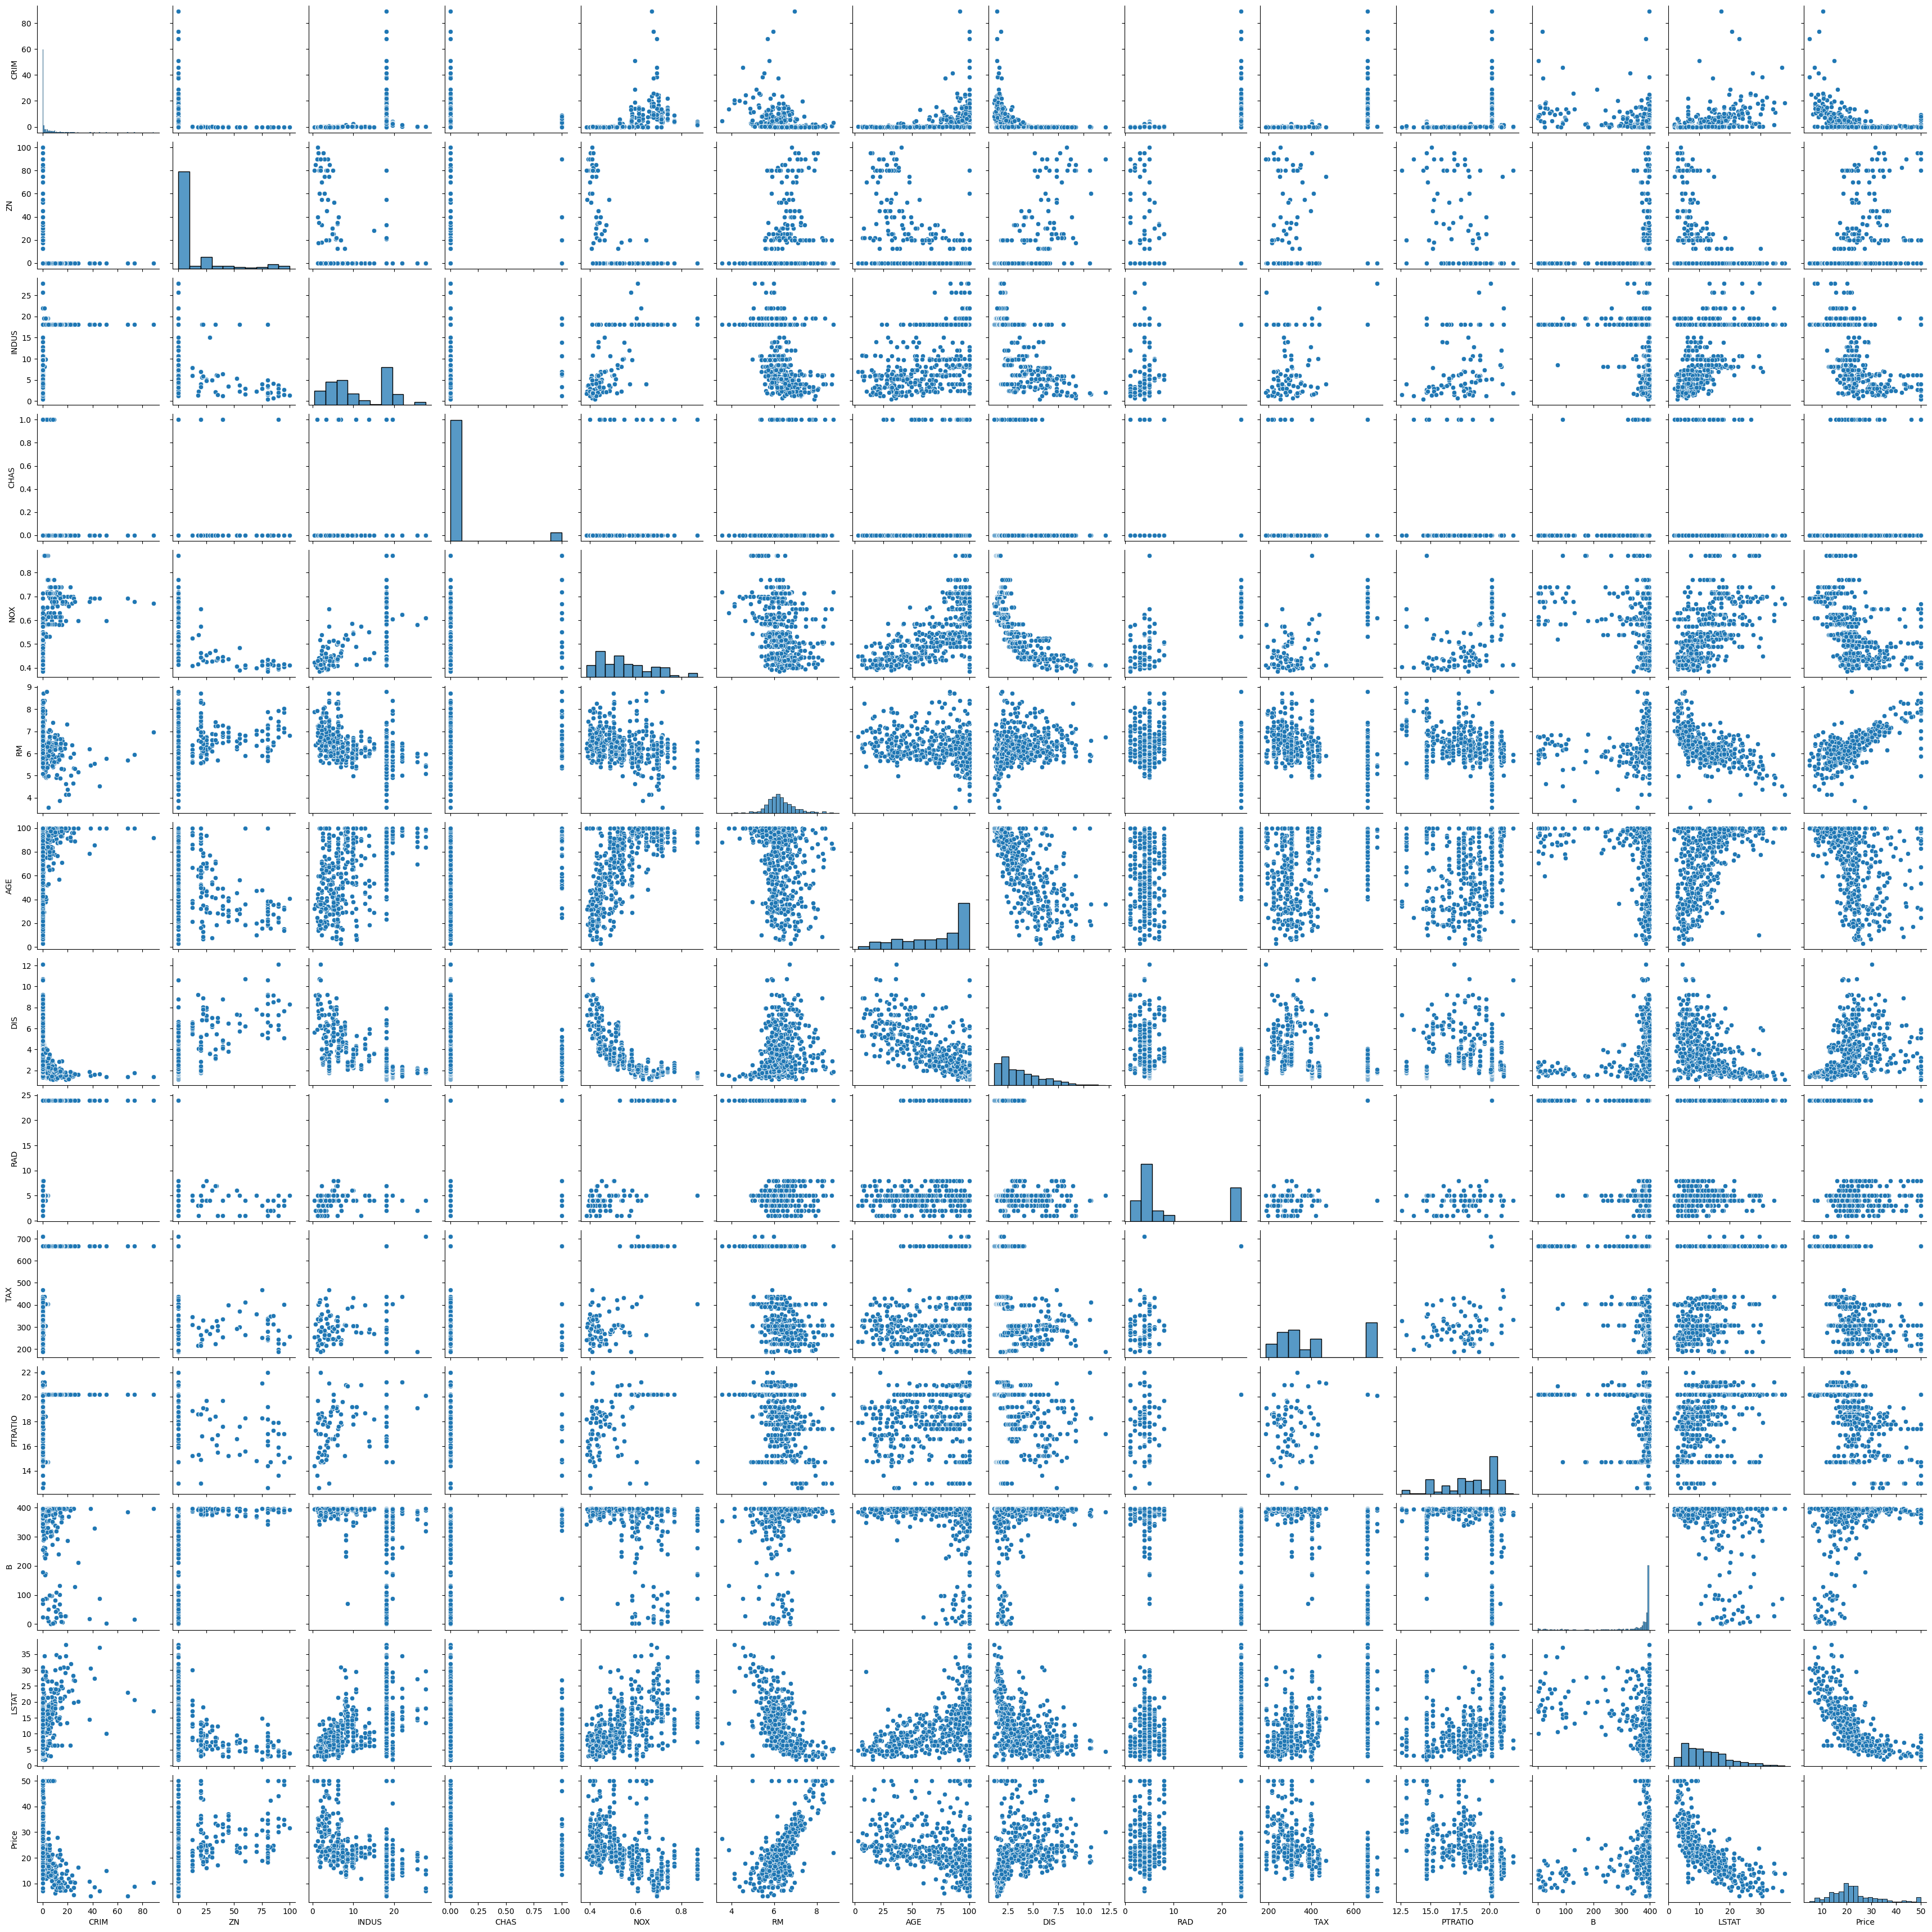

In [ ]:
sns.pairplot(df)

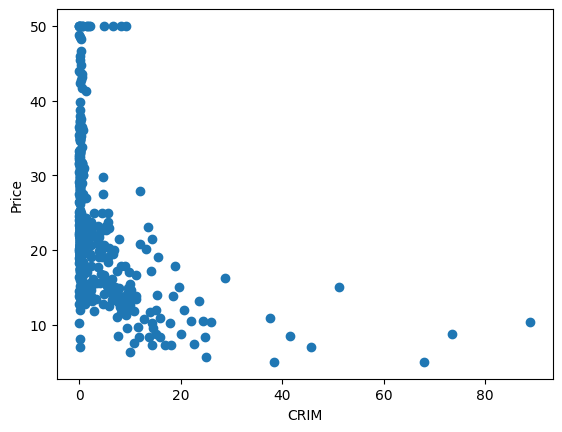

In [ ]:
plt.scatter(df['CRIM'],df['Price'])
plt.xlabel('CRIM')
plt.ylabel('Price')
plt.show()

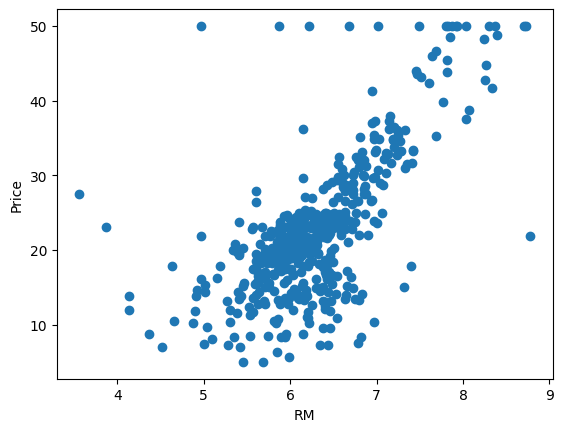

In [ ]:
plt.scatter(df['RM'],df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='RM', ylabel='Price'>

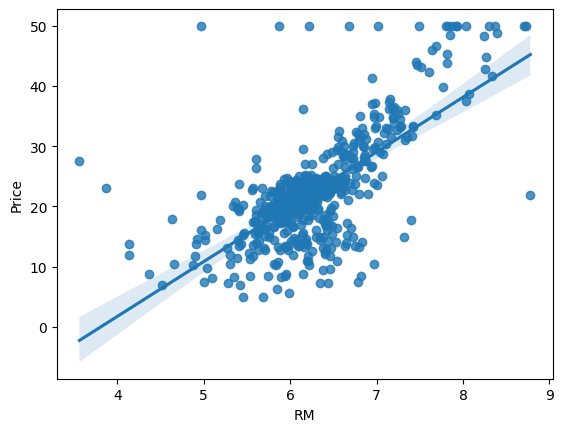

In [ ]:
#Regression plot
sns.regplot(x='RM',y='Price',data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

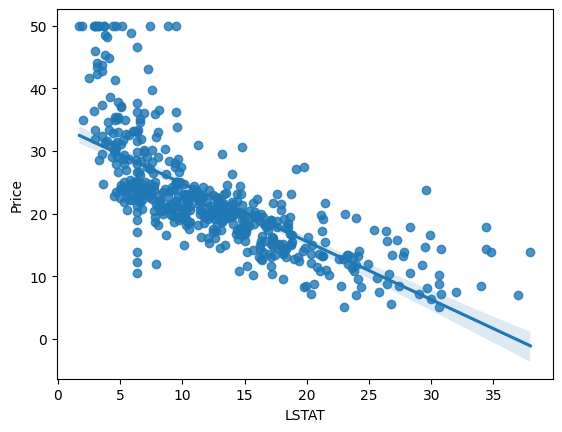

In [ ]:
sns.regplot(x='LSTAT',y='Price',data=df)

<Axes: xlabel='CHAS', ylabel='Price'>

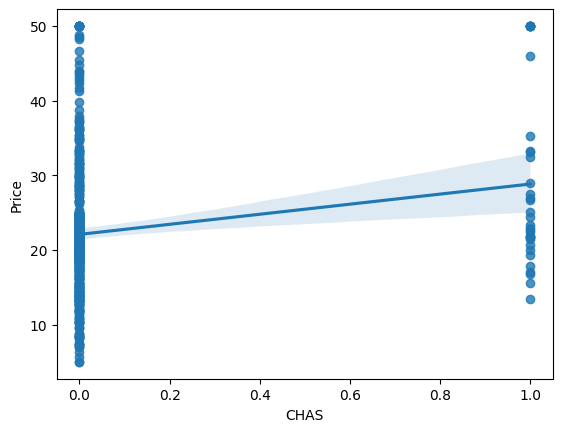

In [ ]:
sns.regplot(x='CHAS',y='Price',data=df)

<Axes: xlabel='RM', ylabel='Price'>

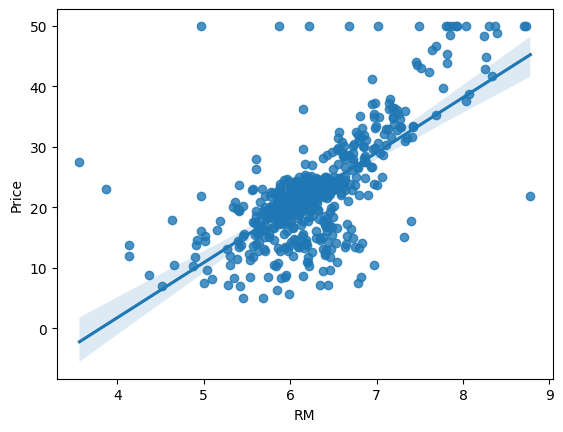

In [ ]:
sns.regplot(x='RM',y='Price',data=df)

In [ ]:
#INDEPENDENT AND DEPENDENT FEATURES
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,6.36


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,6.36
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [ ]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,18.10,0.0,0.510,6.416,100.0,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,6.36
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [ ]:
#Stadardize the dataset
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# MODEL TRAINING

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()